# 갭마인더 데이터 집합 불러오기

데이터 분석을 위하여 가장 먼저 해야 할 일은 데이터를 불러오는 것이다.<br>
이때, 불러오는 데이터를 `데이터 집합`이라고 한다.
<br><br>
먼저 갭마인더라는 "브리티시 콜럼비아 대학"에서 연구 용도로 만든 data를 불러와보겠다.


In [66]:
import pandas as pd

In [11]:
from google.colab import files
files.upload();

Saving gapminder.tsv to gapminder.tsv


책에서는 주피터 환경을 사용하기 때문에 직접 파일 경로를 설정하여 파일을 불러온다. 하지만 colab환경이므로 위 코드를 이용하여 파일을 불러온다.

In [14]:
df = pd.read_csv('gapminder.tsv',sep= '\t')

# 불러온 데이터 집합 살펴보기

In [15]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


먼저 df가 dataframe인지 확인해보겠다.

In [17]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


다음으로는 행령의 크기를 출력해보겠다.

In [19]:
df.shape

(1704, 6)

다음으로는 갭마인더에 어떤 정보가 들어있는지 확인해보겠다.<br>
각 열의 이름을 출력하여 보면 다음과 같다.

In [20]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

데이터프레임을 구성하는 값의 자료형은 데이터프레임의 `dtypes`속성이나 `info`메서드로 쉽게 확인할 수 있다.

In [22]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


# 열 단위로 데이터 추출하기

데이터프레임에서 데이터를 열 단위로 추출하려면 대괄호와 열 이름을 사용해야 한다.<br>이때, 열 이름은 꼭 `작은 따옴표`를 사용해서 지정해야 하고 추출한 열은 변수에 저장해서 사용할 수도 있다.<br>
하나의 열만 추출하면 시리즈를 얻을 수 있고, 2개 이상의 열을 추출하면 데이터프레임을 얻을 수 있다.<br><br>
먼저 'country'열을 추출하여 변수에 저장하여 보도록 한다.

In [25]:
country_df = df['country']
print(type(country_df))
display(country_df.head())
display(country_df.tail())

<class 'pandas.core.series.Series'>


0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object

리스트에 열 이름을 전달하면 여러 개의 열을 한 번에 추출할 수 있다.

In [27]:
subset = df[['country','continent','year']]
type(subset)

pandas.core.frame.DataFrame

In [28]:
subset.head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


In [29]:
subset.tail()

,country,continent,year
1699,Zimbabwe,Africa,1987
1700,Zimbabwe,Africa,1992
1701,Zimbabwe,Africa,1997
1702,Zimbabwe,Africa,2002
1703,Zimbabwe,Africa,2007


# loc 속성으로 행 단위 데이터 추출하기

In [31]:
df.loc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

In [32]:
df.loc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object

단, `loc`를 사용할 때는 인덱스에 존재하지 않는 '-1'과 같은 값을 사용하면 error가 발생한다.

In [33]:
df.loc[-1]

KeyError: ignored

데이터프레임의 마지막 행 데이터를 추출하려면 다음과 같이 실행하면 된다

In [36]:
number_of_rows = df.shape[0]
last_row_index = number_of_rows - 1
df.loc[last_row_index]

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

마지막 행 데이터를 추출하는 다른 방법은 다음과 같다.

In [39]:
df.tail(1)

,country,continent,year,lifeExp,pop,gdpPercap
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


만약 한번에 다양한 인덱스의 데이터를 추출하려면 다음과 같은 방법이 있다.

In [41]:
df.loc[[0,99,999]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
999,Mongolia,Asia,1967,51.253,1149500,1226.041130


# tail과 loc는 조금 달라요!

반환하는 데이터의 자료형이 다르다. loc속성은 `series`를, `tail`메서드는 `dataframe`을 반환한다.

In [42]:
subset_loc = df.loc[0]
subset_tail = df.tail(1)

print(type(subset_loc))
print(type(subset_tail))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


# iloc 속성으로 행 단위 데이터 추출하기

iloc속성은 데이터 순서를 의미하는 행 번호를 사용하여 데이터를 추출한다. 지금은 행 번호와 인덱스가 동일하여 동일한 결과가 출력된다.

In [43]:
df.iloc[1]

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap      820.85303
Name: 1, dtype: object

In [44]:
df.iloc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object

iloc 속성은 음수를 사용해도 데이터를 추출할 수 있다. 내포된 인덱스를 사용하기 때문에 가능한 것이다.

In [45]:
df.iloc[-1]

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

하지만 데이터프레임의 행을 넘어가면 오류가 발생한다.

In [46]:
df.iloc[2000]

IndexError: ignored

iloc 속성도 여러 데이터를 한 번에 추출할 수 있다.

In [47]:
df.iloc[[0,99,999]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
999,Mongolia,Asia,1967,51.253,1149500,1226.041130


# 파이썬 슬라이싱 구문을 조합하여 원하는 데이터 추출하기

모든 행에 대하여 `year`,`pop` 열을 추출하는 방법이다.<br>
이때, loc와 iloc 속성에 전달하는 열 지정값은 반드시 형식에 맞게 전달해야 한다.

In [49]:
subset = df.loc[:,['year','pop']]
subset.head()

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460


In [52]:
subset = df.iloc[:,[2, 4, -1]]
subset.head()

,year,pop,gdpPercap
0,1952,8425333,779.445314
1,1957,9240934,820.853030
2,1962,10267083,853.100710
3,1967,11537966,836.197138
4,1972,13079460,739.981106


# iloc 속성과 range 메서드로 원하는 데이터 추출하기

range메서드는 range(0,6,2)와 같은 방법으로 3개의 인자를 전달하여 0부터 5까지 2만큼 건너뛰는 제네레이터를 생성하는 메서드이다. 이를 이용하면 짝수로 된 정수 리스트를 간단히 얻을 수 있다.

In [53]:
small_range = list(range(0,6,2))
subset = df.iloc[:,small_range]
subset.head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


# 열 지정값에 파이썬 슬라이싱을 사용하여 원하는 데이터 추출하기

하지만 실제로는 rangea 메서드 보다는 간편하게 사용할 수 이쓴ㄴ 파이썬 슬라이싱 구문을 더 선호한다.<br>
range메서드가 반환한 제네레이터를 리스트로 변환하는 등의 과정을 거치지 않아도 되기 때문이다.<br><br>
예를 들어 list(range(3))과 [:3]의 결괏값은 동일하다.

In [54]:
subset = df.iloc[:,:3]
subset.head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


0:6:2를 열 지정값에 전달하면 과정 3에서 얻은 결괏값과 동일한 결괏값을 얻을 수 있다. range메서드와 슬라이싱 구문을 비교하여 보자.

In [55]:
subset = df.iloc[:,0:6:2]
subset.head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


# loc, iloc 자유자재로 사용하기

만일 iloc속성으로 0,99,9999번째 행의 0,3,5번째 열 데이터를 추출하려면 다음과 같이 코드를 작성하면 된다.

In [56]:
df.iloc[[0,99,999],[0,3,5]]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


`iloc속성`의 열 지정값으로 정수 리스트를 전달하는 것이 간편해 보일 수 있지만 이렇게 작성한 코드는 나중에 어떤 데이터를 추출하기 위한 코드인지 파악하지 못할 수도 있다.<br>
따라서 보통은 다음과 같은 방법으로 `loc속성`을 이용하여 열 지정값으로 열 이름을 전달한다.

In [57]:
df.loc[[0,99,999],['country','lifeExp','gdpPercap']]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


**Q. 인덱스가 10인 행부터 13인 행의 country,lifeExp,gdpPercap 열 데이터를 추출하는 코드를 작성하시오.**

In [60]:
df.loc[10:13,['country','lifeExp','gdpPercap']]

,country,lifeExp,gdpPercap
10,Afghanistan,42.129,726.734055
11,Afghanistan,43.828,974.580338
12,Albania,55.230,1601.056136
13,Albania,59.280,1942.284244


# 그룹화한 데이터의 평균 구하기

**lifeExp 열을 연도별로 그룹화하여 평균 계산하기**<br><br>
데이터를 year열로 그룹화하고 lifeExp 열의 평균을 구하면 된다.<br>
그룹화에는 `groupby()`가 사용되고, 평균은 `mean()`메서드가 사용된다.


In [61]:
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

- 단계별로 뜯어보기<br>
먼저 그룹화를 통하여 'year'라는 열 이름을 통해 그룹화한 열을 모은 데이터 프레임을 얻는다.

In [62]:
grouped_year_df = df.groupby('year')
type(grouped_year_df)

pandas.core.groupby.generic.DataFrameGroupBy

`grouped_year_df`입력 시 데이터프레임의 저장메모리의 위치를 알 수 있다.

In [63]:
grouped_year_df

이어서 lifeExp열을 추출한 결과를 살펴본다.

In [67]:
 grouped_year_df_lifeExp= grouped_year_df['lifeExp']
 type(grouped_year_df_lifeExp)

pandas.core.groupby.generic.SeriesGroupBy

In [69]:
mean_lifeExp_by_year = grouped_year_df_lifeExp.mean()
mean_lifeExp_by_year

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

- **응용**<br>
year, continent열로 그룹화한 그룹 데이터프레임에서 lifeExp, gdpPercap 열만 추출하여 평균값을 구해본다.

In [73]:
df.groupby(['year','continent'])['lifeExp','gdpPercap'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

# 그룹화한 데이터의 개수 세어보기

이번에는 그룹화한 데이터의 개수가 몇 개인지 알아본다.<br>
이를 통계에서는 `빈도수`라고 한다. 데이터의 빈도수는 `nunique`메서드를 사용하면 쉽게 구할 수 있다.

In [75]:
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

# 그래프 만들기

그래프를 그리기 위해서는 matplotlib.pyplot라이브러리를 불러와야 한다.

In [77]:
import matplotlib.pyplot as plt
a = df.groupby('year')['lifeExp'].mean()
a

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

이제 이를 plot메서드를 사용하여 출력하면 다음과 같은 그래프가 그려진다.

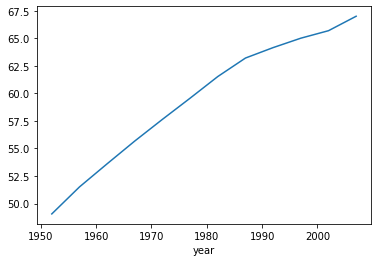

In [78]:
a.plot()